In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Creazione dei dati

In [2]:
# Numero casuale
rnd = np.random
rnd.seed(0)

In [3]:
n = 10    # Numero punti vendita
# Bisogna ricordare che il nodo deposito, nella nostra formulazione, corrisponde a D={'s', 't'}
  # con 's' visto come nodo deposito per l'uscita dei veicoli e 'v' come nodo deposito per entrata
# Di conseguenza, poniamo 's'=xc[0] e 't'=xc[n+1]
xc = rnd.rand(n+1)*200      # Vettore di coordinate x dei vari nodi
xc = np.append(xc, xc[0])   # Coordinate x di 't' devono essere uguali alle coordinate x di 's'
yc = rnd.rand(n+1)*100      # Vettore di coordinate y dei vari nodi
yc = np.append(yc, yc[0])   # Coordinate y di 't' devono essere uguali alle coordinate y di 's'

In [4]:
# CREAZIONE DATI

P = [il for il in range(1,n+1)]         # Insieme P dei punti vendita
N = [0] + P + [n+1]                     # Insieme N dei nodi, come unione di P e D={'s','t'}
                                          # 's' corrisponde al nodo 0, mentre 't' corrisponde al nodo n+1

# Insieme A degli archi
# Devo controllare che il nodo i sia differente da j. Inoltre, devo anche controllare di non includere
  # gli archi ('s','t') e ('t','s') poichè sia 's' che 't' corrispondono al nodo deposito
A = [(i,j) for i in N for j in N if i!=j and (i,j)!=(n+1,0) and (i,j)!=(0,n+1)]

# Costi associati a ogni arco
c = {(i,j): np.random.randint(2,15) for i,j in A}

# Tempo di percorrenza degli archi
# Per semplicità ho posto il tempo di percorrenza come la distanza tra i nodi i e j
t = {(i,j): int(np.hypot(xc[i]-xc[j], yc[i]-yc[j])) for i,j in A}

# Richiesta per ogni nodo
np.random.seed(0)
d = {i: np.random.randint(10,15) for i in P}
d[0] = 0                                    # Nodo deposito 's'
d[n+1] = 0                                  # Nodo deposito 't'

# Finestre di apertura dei punti di vendita
a = {0:0, 1:10, 2:10, 3:10, 4:20, 5:20, 6:20, 7:40, 8:40, 9:40, 10:40, 11:0}      # Orario di apertura
b = {0:200, 1:500, 2:500, 3:600, 4:650, 5:650, 6:650, 7:680, 8:680, 9:680, 10:680, 11:700} # Orario di chiusura

V = [1,2,3,4]                               # Insieme V dei veicoli
Q = {1: 50, 2:50, 3:25, 4:25}               # Insieme Q delle capacità massime dei veicoli

# Tempo di servizio
s = {(i,k): np.random.randint(3,5) if i!=0 and i!=n+1 else 0 for i in N for k in V}

In [5]:
print(P)
print(N)
print(xc)
print(yc)
print(A)
print(c)
print(f"t;{t}")
print(d)
print(a)
print(b)
print(s)
print(V)
print(Q)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[109.76270079 143.03787327 120.55267521 108.9766366   84.73095987
 129.17882261  87.51744225 178.35460016 192.7325521   76.68830377
 158.34500762 109.76270079]
[52.88949198 56.80445611 92.55966383  7.10360582  8.71292997  2.02183974
 83.26198455 77.81567509 87.00121482 97.86183422 79.91585642 52.88949198]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), 

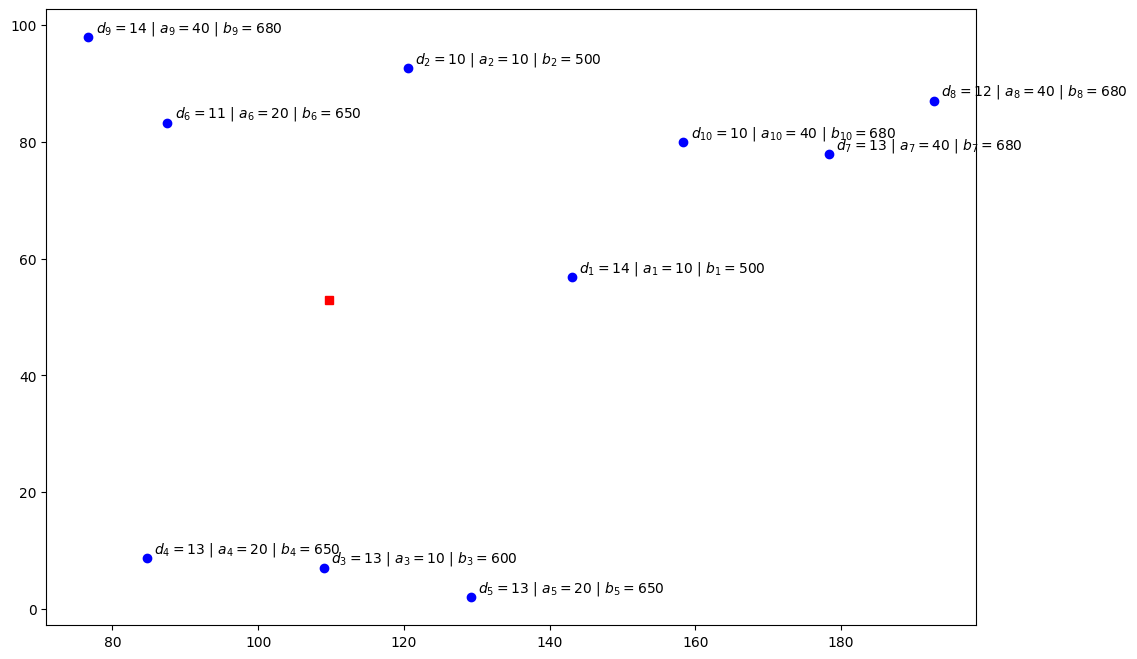

In [6]:
# Visualizzazione deposito e punti vendita
plt.figure(figsize=(12,8))
plt.plot(xc[0], yc[0], c='r', marker='s')     # Nodo deposito
plt.scatter(xc[1:n+1], yc[1:n+1], c='b')          # Nodi punti vendita
for i in P:
  plt.annotate("$d_{%i}=%d$ | $a_{%i}=%d$ | $b_{%i}=%d$" %(i, d[i], i, a[i], i, b[i]), (xc[i]+1, yc[i]+1))

## Algoritmo di Clarke and Wright

In [7]:
# Verifica del vincolo della capacità
def verifica_capacità (rotta, d, capacità):
    domanda_totale = 0
    for i in rotta:
        domanda_totale += d[i]
    #print(f"Domanda totale = {domanda_totale}")
    return domanda_totale <= capacità 

In [8]:
# Verifica del vincolo sulla finestra temporale
def verifica_finestra (rotta, t, s, a, b, veicolo_id):
    tempo_corrente = 0
    nodo_precedente = 0                     # Deposito di partenza

    for i in rotta:
        tempo_corrente += t[nodo_precedente, i]

        # Nel caso in cui arrivo prima dell'apertura, aspetto
        if tempo_corrente < a[i]:
            tempo_corrente = a[i]

        # Nel caso in cui arrivo dopo la chiusura, non è rispettato il vincolo
        if tempo_corrente > b[i]:
            return False

        # Aggiunta del tempo di servizio
        print(s[i, veicolo_id])
        tempo_corrente += s[i, veicolo_id]
        nodo_precedente = i

    # Verifico se è ritornato al deposito t
    if (nodo_precedente, n+1) in t:
        tempo_corrente += t[nodo_precedente, n+1]
        if tempo_corrente > b[n+1]:
            return False
    
    print(tempo_corrente)

    return True

In [9]:
rotta1 = [[1,4,6,7], [2,8,9]]
print(verifica_finestra(rotta1[0], t, s, a, b, 1))

3
4
3
3
358
True


In [10]:
# Si trova la rotta che contiene un nodo estremo e il suo indice
def trova_rotta_contenente (i, rotte_attive):
    # Scorro tra i nodi delle rotte attive
    for r_attiva in rotte_attive:
        if i in r_attiva:
            indice = r_attiva.index(i)
            # Si controlla che sia un estremo
            if indice==0 or indice==len(r_attiva)-1:
                return r_attiva, indice
    return None, -1

In [11]:
# Unione delle rotte
def unisci_rotte (rotta_i, rotta_j, indice_i, indice_j):

    # Sono effettuati vari controlli

    # i è l'ultimo di rotta_i, mentre j è il primo di rotta_j
    if indice_i==len(rotta_i)-1 and indice_j==0:
        return rotta_i + rotta_j
    # j è l'ultimo di rotta_j, mentre i è il primo di rotta_i
    elif indice_j==len(rotta_j)-1 and indice_i==0:
        return rotta_j + rotta_i
    # i è l'ultimo di rotta_i, mentre j è l'ultimo di rotta_j
    elif indice_i==len(rotta_i)-1 and indice_j==len(rotta_j)-1:
        return rotta_i + rotta_j[::-1]
    # i è il primo di rotta_i, mentre j è il primo di rotta_j
    elif indice_i==0 and indice_j==0:
        return rotta_i[::-1] + rotta_j
    
    return None

In [12]:
# Primo step
# Inizializzazione di ogni punto vendita come rotta separata
rotte = []
for k in V:
    rotte = {k: [] for k in V}

# Inizializzo ogni punto vendita come rotta separata
rotte_attive = [[i] for i in P]

assegnazione = {}          # Lista di associazione di ogni rotta al veicolo

for r_attiva in rotte_attive:
    for k in V:
        if verifica_capacità(r_attiva, d, Q[k]):
            assegnazione[tuple(r_attiva)] = k
            break

In [13]:
assegnazione

{(1,): 1,
 (2,): 1,
 (3,): 1,
 (4,): 1,
 (5,): 1,
 (6,): 1,
 (7,): 1,
 (8,): 1,
 (9,): 1,
 (10,): 1}

In [14]:
# Secondo step 
# Calcolo savings
savings = []
for i in range(len(N)):
    for j in range(i+1, len(N)):
        if (i,j) in A:
            # Il tempo di percorrenza t precedentemente non era stato calcolato per i nodi
                # (0,0), (0,11), (11,0) e (11,11). Di conseguenza è stato necessario escludere 
                # tali nodi
            if i==0 and j==0:                             
                sav = 0
            elif i==0:
                sav = c[0,j] - c[i,j]
            elif j==0:
                sav = c[0,i] - c[i,j]
            elif i==n+1 and j==n+1:                   
                sav = 0
            elif i==n+1:
                sav = c[0,j] - c[i,j]
            elif j==n+1:
                sav = c[0,i] - c[i,j]
            else:
                sav =c[0,i] + c[0,j] - c[i,j]
            savings.append(((N[i], N[j]), sav))

In [15]:
savings

[((0, 1), 0),
 ((0, 2), 0),
 ((0, 3), 0),
 ((0, 4), 0),
 ((0, 5), 0),
 ((0, 6), 0),
 ((0, 7), 0),
 ((0, 8), 0),
 ((0, 9), 0),
 ((0, 10), 0),
 ((1, 2), 1),
 ((1, 3), 5),
 ((1, 4), 1),
 ((1, 5), 3),
 ((1, 6), -1),
 ((1, 7), 2),
 ((1, 8), 12),
 ((1, 9), 5),
 ((1, 10), 15),
 ((1, 11), -1),
 ((2, 3), 2),
 ((2, 4), 4),
 ((2, 5), 1),
 ((2, 6), 5),
 ((2, 7), 10),
 ((2, 8), 5),
 ((2, 9), -5),
 ((2, 10), 5),
 ((2, 11), -5),
 ((3, 4), 3),
 ((3, 5), -4),
 ((3, 6), 3),
 ((3, 7), 8),
 ((3, 8), 7),
 ((3, 9), -6),
 ((3, 10), 13),
 ((3, 11), -8),
 ((4, 5), 0),
 ((4, 6), 0),
 ((4, 7), 14),
 ((4, 8), 7),
 ((4, 9), 5),
 ((4, 10), 13),
 ((4, 11), 3),
 ((5, 6), -5),
 ((5, 7), 7),
 ((5, 8), 8),
 ((5, 9), -8),
 ((5, 10), 5),
 ((5, 11), -5),
 ((6, 7), 12),
 ((6, 8), 7),
 ((6, 9), 3),
 ((6, 10), 12),
 ((6, 11), -1),
 ((7, 8), 13),
 ((7, 9), 6),
 ((7, 10), 12),
 ((7, 11), 9),
 ((8, 9), 9),
 ((8, 10), 18),
 ((8, 11), -2),
 ((9, 10), 11),
 ((9, 11), -4),
 ((10, 11), 10)]

In [16]:
# Ordinamento dei saving in ordine decrescente
savings.sort(key=lambda x: x[1], reverse=True)

In [17]:
savings

[((8, 10), 18),
 ((1, 10), 15),
 ((4, 7), 14),
 ((3, 10), 13),
 ((4, 10), 13),
 ((7, 8), 13),
 ((1, 8), 12),
 ((6, 7), 12),
 ((6, 10), 12),
 ((7, 10), 12),
 ((9, 10), 11),
 ((2, 7), 10),
 ((10, 11), 10),
 ((7, 11), 9),
 ((8, 9), 9),
 ((3, 7), 8),
 ((5, 8), 8),
 ((3, 8), 7),
 ((4, 8), 7),
 ((5, 7), 7),
 ((6, 8), 7),
 ((7, 9), 6),
 ((1, 3), 5),
 ((1, 9), 5),
 ((2, 6), 5),
 ((2, 8), 5),
 ((2, 10), 5),
 ((4, 9), 5),
 ((5, 10), 5),
 ((2, 4), 4),
 ((1, 5), 3),
 ((3, 4), 3),
 ((3, 6), 3),
 ((4, 11), 3),
 ((6, 9), 3),
 ((1, 7), 2),
 ((2, 3), 2),
 ((1, 2), 1),
 ((1, 4), 1),
 ((2, 5), 1),
 ((0, 1), 0),
 ((0, 2), 0),
 ((0, 3), 0),
 ((0, 4), 0),
 ((0, 5), 0),
 ((0, 6), 0),
 ((0, 7), 0),
 ((0, 8), 0),
 ((0, 9), 0),
 ((0, 10), 0),
 ((4, 5), 0),
 ((4, 6), 0),
 ((1, 6), -1),
 ((1, 11), -1),
 ((6, 11), -1),
 ((8, 11), -2),
 ((3, 5), -4),
 ((9, 11), -4),
 ((2, 9), -5),
 ((2, 11), -5),
 ((5, 6), -5),
 ((5, 11), -5),
 ((3, 9), -6),
 ((3, 11), -8),
 ((5, 9), -8)]

In [18]:
# Terzo step
# Iterazione sui savings
iterazione = 0
unioni_effettuate = 0

for (i,j),sav_ij in savings:
    if sav_ij <= 0:             # I savings <= 0 possono essere esclusi
        break
    
    iterazione += 1

    # Si trovano le rotte contenenti i e j come estremi
    rotta_i, indice_i = trova_rotta_contenente(i, rotte_attive)
    rotta_j, indice_j = trova_rotta_contenente(j, rotte_attive)

    # Se non sono stati trovati, si saltano
    if rotta_i is None or rotta_j is None or rotta_i==rotta_j:
        continue

    # Ottieni i veicoli assegnati
    veicolo_i = assegnazione.get(tuple(rotta_i))
    veicolo_j = assegnazione.get(tuple(rotta_j))

    if veicolo_i is None or veicolo_j is None:
        continue

    # Tentativo di unione
    nuova_rotta = unisci_rotte(rotta_i, rotta_j, indice_i, indice_j)

    # Scelta del veicolo con maggiore capacità
    if Q[veicolo_i] >= Q[veicolo_j]:
        veicolo_scelto = veicolo_i
    else:
        veicolo_scelto = veicolo_j

    # Quarto step
    if (verifica_capacità(nuova_rotta, d, Q[veicolo_scelto])) and (verifica_finestra(nuova_rotta, t, s, a, b, veicolo_scelto)):
        print(f"Iterazione {iterazione}: Unisco tour {rotta_i} e {rotta_j}")
        print(f"  Saving: {sav_ij:.2f}")
        print(f"  Veicolo scelto: {veicolo_scelto} (Q={Q[veicolo_scelto]})")
        print(f"  Nuovo tour: {nuova_rotta}")

    # Rimozione delle vecchie rotte
    rotte_attive.remove(rotta_i)
    rotte_attive.remove(rotta_j)
    del assegnazione[tuple(rotta_i)]
    del assegnazione[tuple(rotta_j)]

    # Aggiunta della nuova rotta
    rotte_attive.append(nuova_rotta)
    assegnazione[tuple(nuova_rotta)] = veicolo_scelto
    unioni_effettuate += 1

    print(f"Numero di rotte attive: {len(rotte_attive)}\n")

4
4
187
Iterazione 1: Unisco tour [8] e [10]
  Saving: 18.00
  Veicolo scelto: 1 (Q=50)
  Nuovo tour: [8, 10]
Numero di rotte attive: 9

4
4
3
195
Iterazione 2: Unisco tour [1] e [8, 10]
  Saving: 15.00
  Veicolo scelto: 1 (Q=50)
  Nuovo tour: [8, 10, 1]
Numero di rotte attive: 8

4
3
245
Iterazione 3: Unisco tour [4] e [7]
  Saving: 14.00
  Veicolo scelto: 1 (Q=50)
  Nuovo tour: [4, 7]
Numero di rotte attive: 7

Numero di rotte attive: 6

Numero di rotte attive: 5

3
3
118
Iterazione 25: Unisco tour [2] e [6]
  Saving: 5.00
  Veicolo scelto: 1 (Q=50)
  Nuovo tour: [2, 6]
Numero di rotte attive: 4

Numero di rotte attive: 3

Numero di rotte attive: 2

Numero di rotte attive: 1



In [19]:
# Quinto step
rotte_per_veicolo = {k: [] for k in V}
for rotta, veicolo in assegnazione.items():
    rotte_per_veicolo[veicolo].append(list(rotta))

    print(f"\n{'='*70}")
    print("SOLUZIONE FINALE")
    print(f"{'='*70}")
    print(f"Unioni effettuate: {unioni_effettuate}")
    print(f"Iterazioni totali: {iterazione}")


SOLUZIONE FINALE
Unioni effettuate: 9
Iterazioni totali: 40


In [20]:
rotte_per_veicolo

{1: [[9, 4, 7, 8, 10, 1, 3, 6, 2, 5]], 2: [], 3: [], 4: []}

In [23]:
costo_tot = 0
for veicol, liste_rotte in rotte_per_veicolo.items():
    for rot in liste_rotte:
        print(rot)
        for nodo in range(len(rot)-1):
            i,j = rot[nodo], rot[nodo+1]
            print(f"Veicolo {veicolo}: arco ({i},{j})")
            costo_tot += c[i,j]
print(f"Costo totale: {costo_tot}")

[9, 4, 7, 8, 10, 1, 3, 6, 2, 5]
Veicolo 1: arco (9,4)
Veicolo 1: arco (4,7)
Veicolo 1: arco (7,8)
Veicolo 1: arco (8,10)
Veicolo 1: arco (10,1)
Veicolo 1: arco (1,3)
Veicolo 1: arco (3,6)
Veicolo 1: arco (6,2)
Veicolo 1: arco (2,5)
Costo totale: 50
